In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

In [1]:
ROUTES_DATAFRAME_FILE = "../data/cleaned/earth_routes.csv"
ENVIRONMENT_DATA_FILE = "../data/cleaned/earth_aviation_data.json"

# Route exploration 

In [51]:
route_full_graph = nx.from_pandas_edgelist(joined_route_df, 
                                           'City_source_airport', 
                                           'City_destination_airport',
                                           'distance_in_km')

In [52]:
SOURCE = "Ottawa"
DESTINATION = "Delhi"



# # RETURNS the shortest path to all points in the grapg for SOURCE
# path = nx.single_source_shortest_path(route_full_graph, "Moscow")



# RETURNS all the shortest paths for SOURCE and DESTINATION
all_shortest_path = nx.all_shortest_paths(route_full_graph, source=SOURCE, target=DESTINATION)
print("List of all short paths:", [path for path in all_shortest_path])
print()



# RETURNS the shortest path using dijkstra algorithm
dijkstra_shortest_path = nx.dijkstra_path(route_full_graph, source=SOURCE, target=DESTINATION)
print("Dijkstra Path:\t\t", dijkstra_shortest_path)

# RETURNS the length of shortest paths using dijkstra algorithm
dijkstra_length_of_path = nx.dijkstra_path_length(route_full_graph, source=SOURCE, target=DESTINATION)
print("Dijkstra Path Length:\t", dijkstra_length_of_path)

# RETURNS path weigh given PATH
path_weight = nx.path_weight(route_full_graph, dijkstra_shortest_path, "distance_in_km")
print("Weigth of the path:\t", path_weight)

# GET weight between edges
edges_weight = route_full_graph.edges[dijkstra_shortest_path[0],dijkstra_shortest_path[1]]['distance_in_km']
print("Weight between ",dijkstra_shortest_path[0], " and ", dijkstra_shortest_path[1], ": ", edges_weight)
print()

List of all short paths: [['Ottawa', 'London', 'Delhi'], ['Ottawa', 'Frankfurt', 'Delhi']]

Dijkstra Path:		 ['Ottawa', 'London', 'Delhi']
Dijkstra Path Length:	 2
Weigth of the path:	 12077.530534985392
Weight between  Ottawa  and  London :  5346.242994317364



# World Data exploration

In [53]:
COUNTRY = "India"
CITY = "Ottawa"

In [54]:
# airlines by country
airlines_df[airlines_df.Country == COUNTRY]

Airline_ID                 Name IATA ICAO Country
38         218    Air India Limited   AI  AIC   India
45         241           Air Sahara   S2  RSH   India
93         569    Air India Express   IX  AXB   India
298       2575               Go Air   G8  GOW   India
328       2850      IndiGo Airlines   6E  IGO   India
329       2853      Indian Airlines   IC  IAC   India
353       3000          Jet Airways   9W  JAI   India
368       3142  Kingfisher Airlines   IT  KFR   India
467       3907    Paramount Airways   I7  PMW   India
501       4375             Spicejet   SG  SEJ   India
720      16327  Indya Airline Group   G1  IG1   India
740      16901             12 North   12  N12   India
830      20264          Air Vistara   UK  VTI   India
834      20286          Air Pegasus   OP  PPL   India

In [55]:
# airports by country
airport_df[airport_df.Country == COUNTRY]

Airport_ID                                            Name         City  \
2288       2994  Sardar Vallabhbhai Patel International Airport    Ahmedabad   
2289       2995                                   Akola Airport        Akola   
2290       2996                              Aurangabad Airport   Aurangabad   
2291       2997       Chhatrapati Shivaji International Airport       Mumbai   
2292       2998                                Bilaspur Airport     Bilaspur   
...         ...                                             ...          ...   
5966      13511                     Vijayanagar Aerodrome (JSW)  Toranagallu   
5967      13513                                  Shirdi Airport       Shirdi   
5968      13514                                 Jeypore Airport      Jeypore   
6012      13724                              Kishangarh Airport        Ajmer   
6013      13725                    Kannur International Airport       Kannur   

     Country IATA  ICAO   Latitude  Longitude  Altitude  
2288   India  AMD  VAAH  23.077200  72.634697       189  
2289   India  AKD  VAAK  20.698999  77.058601       999  
2290   India  IXU  VAAU  19.862700  75.398102      1911  
2291   India  BOM  VABB  19.088699  72.867897        39  
2292   India  PAB  VABI  21.988400  82.111000       899  
...      ...  ...   ...        ...        ...       ...  
5966   India  VDY  VOJV  15.174967  76.634947      1670  
5967   India  SAG  VASD  19.688611  74.378889      1926  
5968   India  PYB  VEJP  18.879999  82.552002      1952  
6012   India  KQH  VIKG  26.601473  74.814147         0  
6013   India  CNN  VOKN  11.918614  75.547211       330  

[120 rows x 9 columns]

In [56]:
# Source by city
joined_route_df[joined_route_df.City_source_airport == CITY]

Airline_ID Source airport ID Destination airport ID  \
3290         330               100                    507   
5901         330               100                    340   
16984        330               100                    193   
16985       5416               100                    193   
21037        330               100                    146   
30489        330               100                    156   
31587        330               100                    178   
31588       5416               100                    178   
40223        330               100                     49   
40224       5416               100                     49   
40285       5416               100                    160   
44784        330               100                     73   
44785       4021               100                     73   
44786       5416               100                     73   
44827        341               100                    196   
44868       1623               100                     55   
44869       2354               100                     55   
44884       4021               100                    117   
44889       4021               100                    144   
44902       5416               100                    189   

                     Name_airline IATA_airline ICAO_airline Country_airline  \
3290                   Air Canada           AC          ACA          Canada   
5901                   Air Canada           AC          ACA          Canada   
16984                  Air Canada           AC          ACA          Canada   
16985                     WestJet           WS          WJA          Canada   
21037                  Air Canada           AC          ACA          Canada   
30489                  Air Canada           AC          ACA          Canada   
31587                  Air Canada           AC          ACA          Canada   
31588                     WestJet           WS          WJA          Canada   
40223                  Air Canada           AC          ACA          Canada   
40224                     WestJet           WS          WJA          Canada   
40285                     WestJet           WS          WJA          Canada   
44784                  Air Canada           AC          ACA          Canada   
44785             Porter Airlines           PD          POE          Canada   
44786                     WestJet           WS          WJA          Canada   
44827  Air North Charter - Canada           4N          ANT          Canada   
44868              Canadian North           5T          MPE          Canada   
44869                   First Air           7F          FAB          Canada   
44884             Porter Airlines           PD          POE          Canada   
44889             Porter Airlines           PD          POE          Canada   
44902                     WestJet           WS          WJA          Canada   

                                  Name_source_airport City_source_airport  \
3290   Ottawa Macdonald-Cartier International Airport              Ottawa   
5901   Ottawa Macdonald-Cartier International Airport              Ottawa   
16984  Ottawa Macdonald-Cartier International Airport              Ottawa   
16985  Ottawa Macdonald-Cartier International Airport              Ottawa   
21037  Ottawa Macdonald-Cartier International Airport              Ottawa   
30489  Ottawa Macdonald-Cartier International Airport              Ottawa   
31587  Ottawa Macdonald-Cartier International Airport              Ottawa   
31588  Ottawa Macdonald-Cartier International Airport              Ottawa   
40223  Ottawa Macdonald-Cartier International Airport              Ottawa   
40224  Ottawa Macdonald-Cartier International Airport              Ottawa   
40285  Ottawa Macdonald-Cartier International Airport              Ottawa   
44784  Ottawa Macdonald-Cartier International Airport              Ottawa   
44785  Ottawa Macdonald-Cartier International Airport          

In [57]:
# Destination by city
joined_route_df[joined_route_df.City_destination_airport == CITY]

Airline_ID Source airport ID Destination airport ID  \
40260        330               156                    100   
40261        330                49                    100   
40262       5416                49                    100   
40263        330               178                    100   
40264       5416               178                    100   
40265        341               196                    100   
40266        330               340                    100   
40267        330               507                    100   
40268       1623                55                    100   
40269       2354                55                    100   
40270        330               146                    100   
40271       5416               160                    100   
40272        330               193                    100   
40273       5416               193                    100   
40274        330                73                    100   
40275       4021                73                    100   
40276       5416                73                    100   
40277       4021               117                    100   
40278       5416               189                    100   
40279       4021               144                    100   

                     Name_airline IATA_airline ICAO_airline Country_airline  \
40260                  Air Canada           AC          ACA          Canada   
40261                  Air Canada           AC          ACA          Canada   
40262                     WestJet           WS          WJA          Canada   
40263                  Air Canada           AC          ACA          Canada   
40264                     WestJet           WS          WJA          Canada   
40265  Air North Charter - Canada           4N          ANT          Canada   
40266                  Air Canada           AC          ACA          Canada   
40267                  Air Canada           AC          ACA          Canada   
40268              Canadian North           5T          MPE          Canada   
40269                   First Air           7F          FAB          Canada   
40270                  Air Canada           AC          ACA          Canada   
40271                     WestJet           WS          WJA          Canada   
40272                  Air Canada           AC          ACA          Canada   
40273                     WestJet           WS          WJA          Canada   
40274                  Air Canada           AC          ACA          Canada   
40275             Porter Airlines           PD          POE          Canada   
40276                     WestJet           WS          WJA          Canada   
40277             Porter Airlines           PD          POE          Canada   
40278                     WestJet           WS          WJA          Canada   
40279             Porter Airlines           PD          POE          Canada   

                                     Name_source_airport City_source_airport  \
40260                    Vancouver International Airport           Vancouver   
40261                     Edmonton International Airport            Edmonton   
40262                     Edmonton International Airport            Edmonton   
40263                      Calgary International Airport             Calgary   
40264                      Calgary International Airport             Calgary   
40265                                Yellowknife Airport         Yellowknife   
40266                          Frankfurt am Main Airport           Frankfurt   
40267                            London Heathrow Airport              London   
40268                                    Iqaluit Airport             Iqaluit   
40269                                    Iqaluit Airport             Iqaluit   
40270  Montreal / Pierre Elliott Trudeau Internationa...            Montreal   
40271  Winnipeg / James Armstrong Richardson Internat...            Winnipeg   
40272            Lester 

In [58]:
joined_route_df.groupby((["Country_source_airport","Country_destination_airport"])).min()[["Name_airline","distance_in_km"]]

Name_airline  \
Country_source_airport Country_destination_airport                           
Afghanistan            Afghanistan                  Ariana Afghan Airlines   
                       Azerbaijan                   Ariana Afghan Airlines   
                       India                             Air India Limited   
                       Iran                           Iran Aseman Airlines   
                       Kuwait                       Ariana Afghan Airlines   
...                                                                    ...   
Zimbabwe               Namibia                                 Air Namibia   
                       South Africa                           Air Zimbabwe   
                       Tanzania                                   Egyptair   
                       Zambia                                  Air Namibia   
                       Zimbabwe                               Air Zimbabwe   

                                                    distance_in_km  
Country_source_airport Country_destination_airport                  
Afghanistan            Afghanistan                      299.030012  
                       Azerbaijan                      1808.585825  
                       India                           1001.292104  
                       Iran                             325.468305  
                       Kuwait                          2086.906910  
...                                                            ...  
Zimbabwe               Namibia                          999.332921  
                       South Africa                     681.773710  
                       Tanzania                        1511.146401  
                       Zambia                           403.430099  
                       Zimbabwe                         348.563433  

[4535 rows x 2 columns]

# Creating Canada route dataset

In [85]:
canada_route_df = joined_route_df.loc[(joined_route_df['Country_source_airport'] == "Canada") ^ (joined_route_df['Country_destination_airport'] == "Canada")]

In [86]:
canada_route_df.reset_index(drop= True, inplace=True)

In [87]:
canada_route_df.drop(['ICAO_airline',
                      'ICAO_source_airport',
                      'ICAO_destination_airport'], inplace = True, axis =1)

C:\Users\a_mut\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [88]:
canada_route_df.head()

Airline_ID Source airport ID Destination airport ID  \
0        330               193                   1701   
1       4951               193                   1701   
2        130               193                   2985   
3       5067               193                   2988   
4       1317               146                   3941   

                Name_airline IATA_airline Country_airline  \
0                 Air Canada           AC          Canada   
1           Turkish Airlines           TK          Turkey   
2  Aeroflot Russian Airlines           SU          Russia   
3         Transaero Airlines           UN          Russia   
4                Air Transat           TS          Canada   

                                 Name_source_airport City_source_airport  \
0            Lester B. Pearson International Airport             Toronto   
1            Lester B. Pearson International Airport             Toronto   
2            Lester B. Pearson International Airport             Toronto   
3            Lester B. Pearson International Airport             Toronto   
4  Montreal / Pierre Elliott Trudeau Internationa...            Montreal   

  Country_source_airport IATA_source_airport  ...  Longitude_source_airport  \
0                 Canada                 YYZ  ...                -79.630600   
1                 Canada                 YYZ  ...                -79.630600   
2                 Canada                 YYZ  ...                -79.630600   
3                 Canada                 YYZ  ...                -79.630600   
4                 Canada                 YUL  ...                -73.740799   

   Altitude_source_airport                     Name_destination_airport  \
0                      569                Atatürk International Airport   
1                      569                Atatürk International Airport   
2                      569           Sheremetyevo International Airport   
3                      569                Vnukovo International Airport   
4                      118  Eleftherios Venizelos International Airport   

  City_destination_airport Country_destination_airport  \
0                 Istanbul                      Turkey   
1                 Istanbul                      Turkey   
2                   Moscow                      Russia   
3                   Moscow                      Russia   
4                   Athens                      Greece   

  IATA_destination_airport Latitude_destination_airport  \
0                      ISL                    40.976898   
1                      ISL                    40.976898   
2                      SVO                    55.972599   
3                      VKO                    55.591499   
4                      ATH                    37.936401   

   Longitude_destination_airport  Altitude_destination_airport  distance_in_km  
0                      28.814600                           163     8198.837510  
1                      28.814600                           163     8198.837510  
2                      37.414600                           622     7466.729065  
3                      37.261501                           685     7490.344660  
4                      23.944500                           308     7631.852924  

[5 rows x 21 columns]

# Visulize Canada route dataset

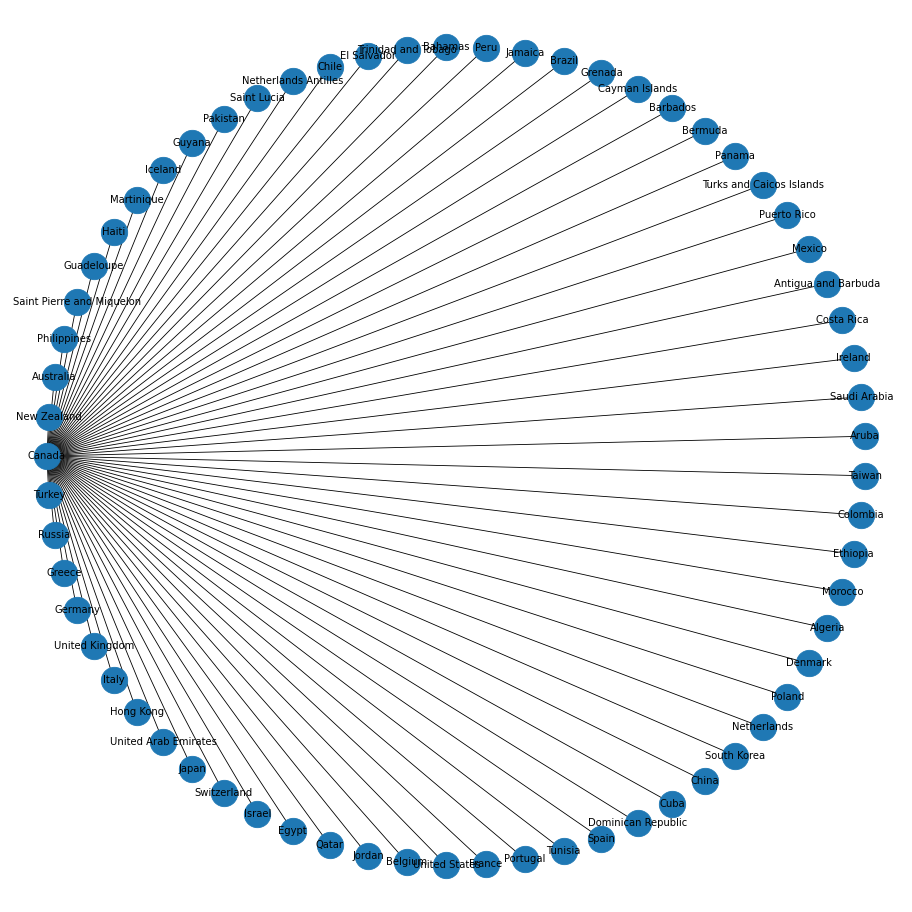

In [96]:
canada_countries_connection_graph = nx.from_pandas_edgelist(canada_route_df, 
                                                    "Country_source_airport", 
                                                    "Country_destination_airport", 
                                                    "distance_in_km")
fig = plt.figure(1, figsize=(15, 15), dpi=60)
nx.draw_shell(canada_countries_connection_graph, node_size=1000, with_labels=True)

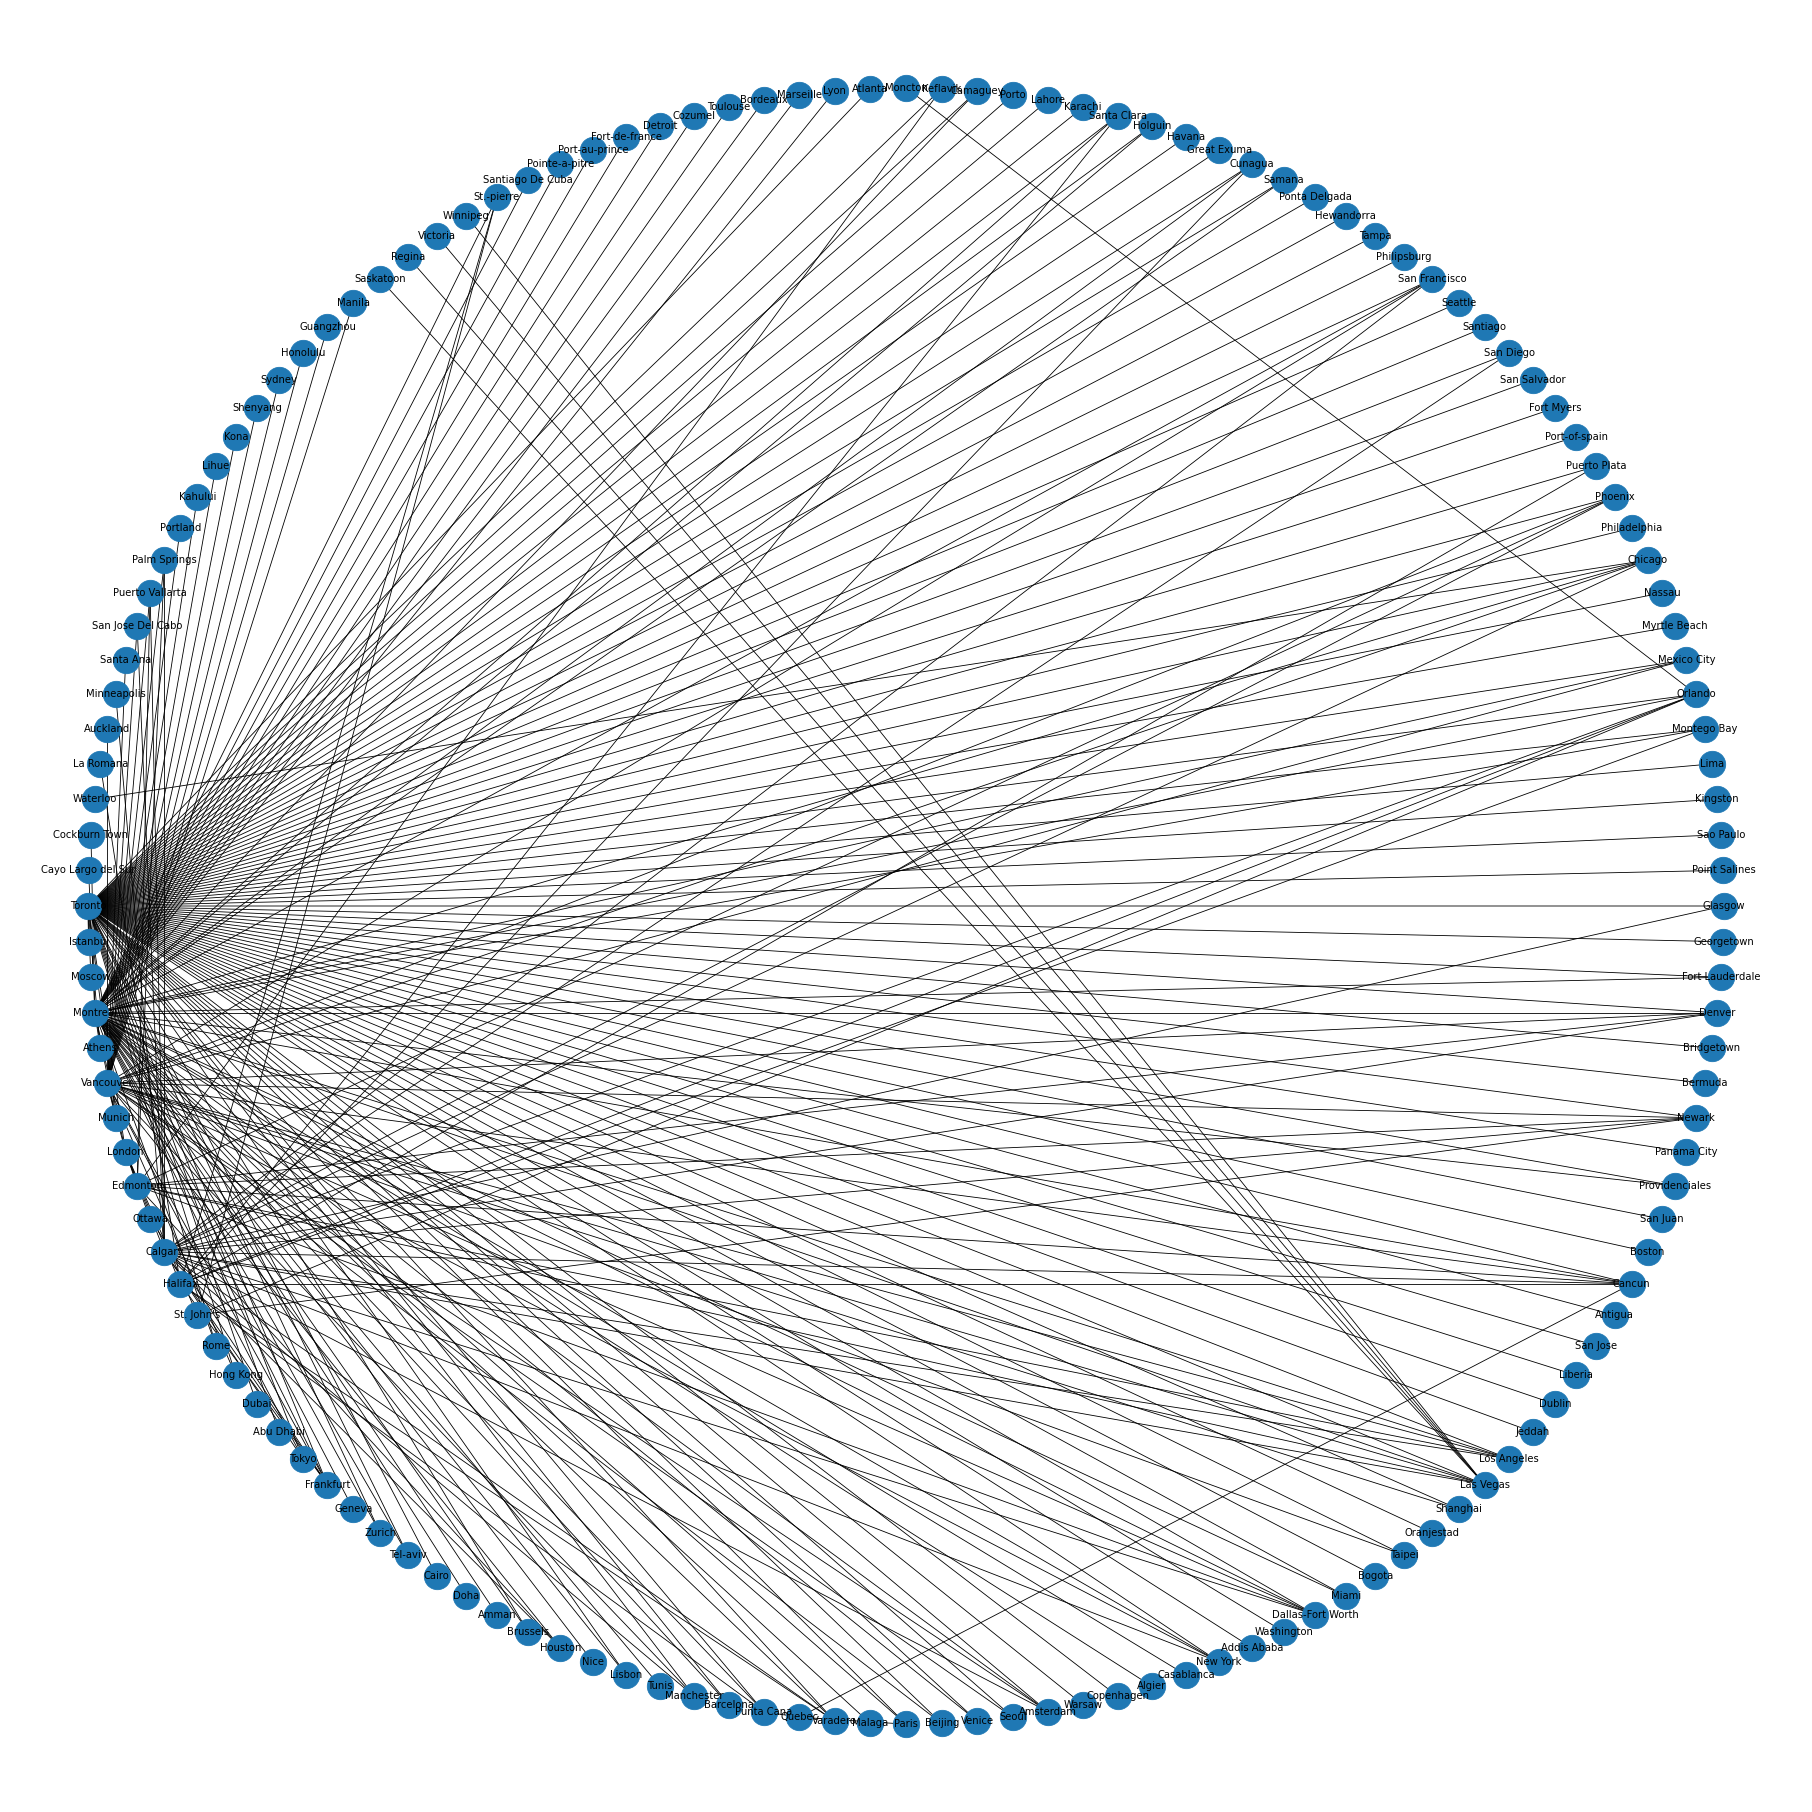

In [104]:
canada_city_connection_graph = nx.from_pandas_edgelist(canada_route_df, 
                                                          'City_source_airport', 
                                                          'City_destination_airport', 
                                                          'distance_in_km')
fig = plt.figure(1, figsize=(30, 30), dpi=60)
nx.draw_shell(canada_airport_connection_graph, node_size=1000, with_labels=True)

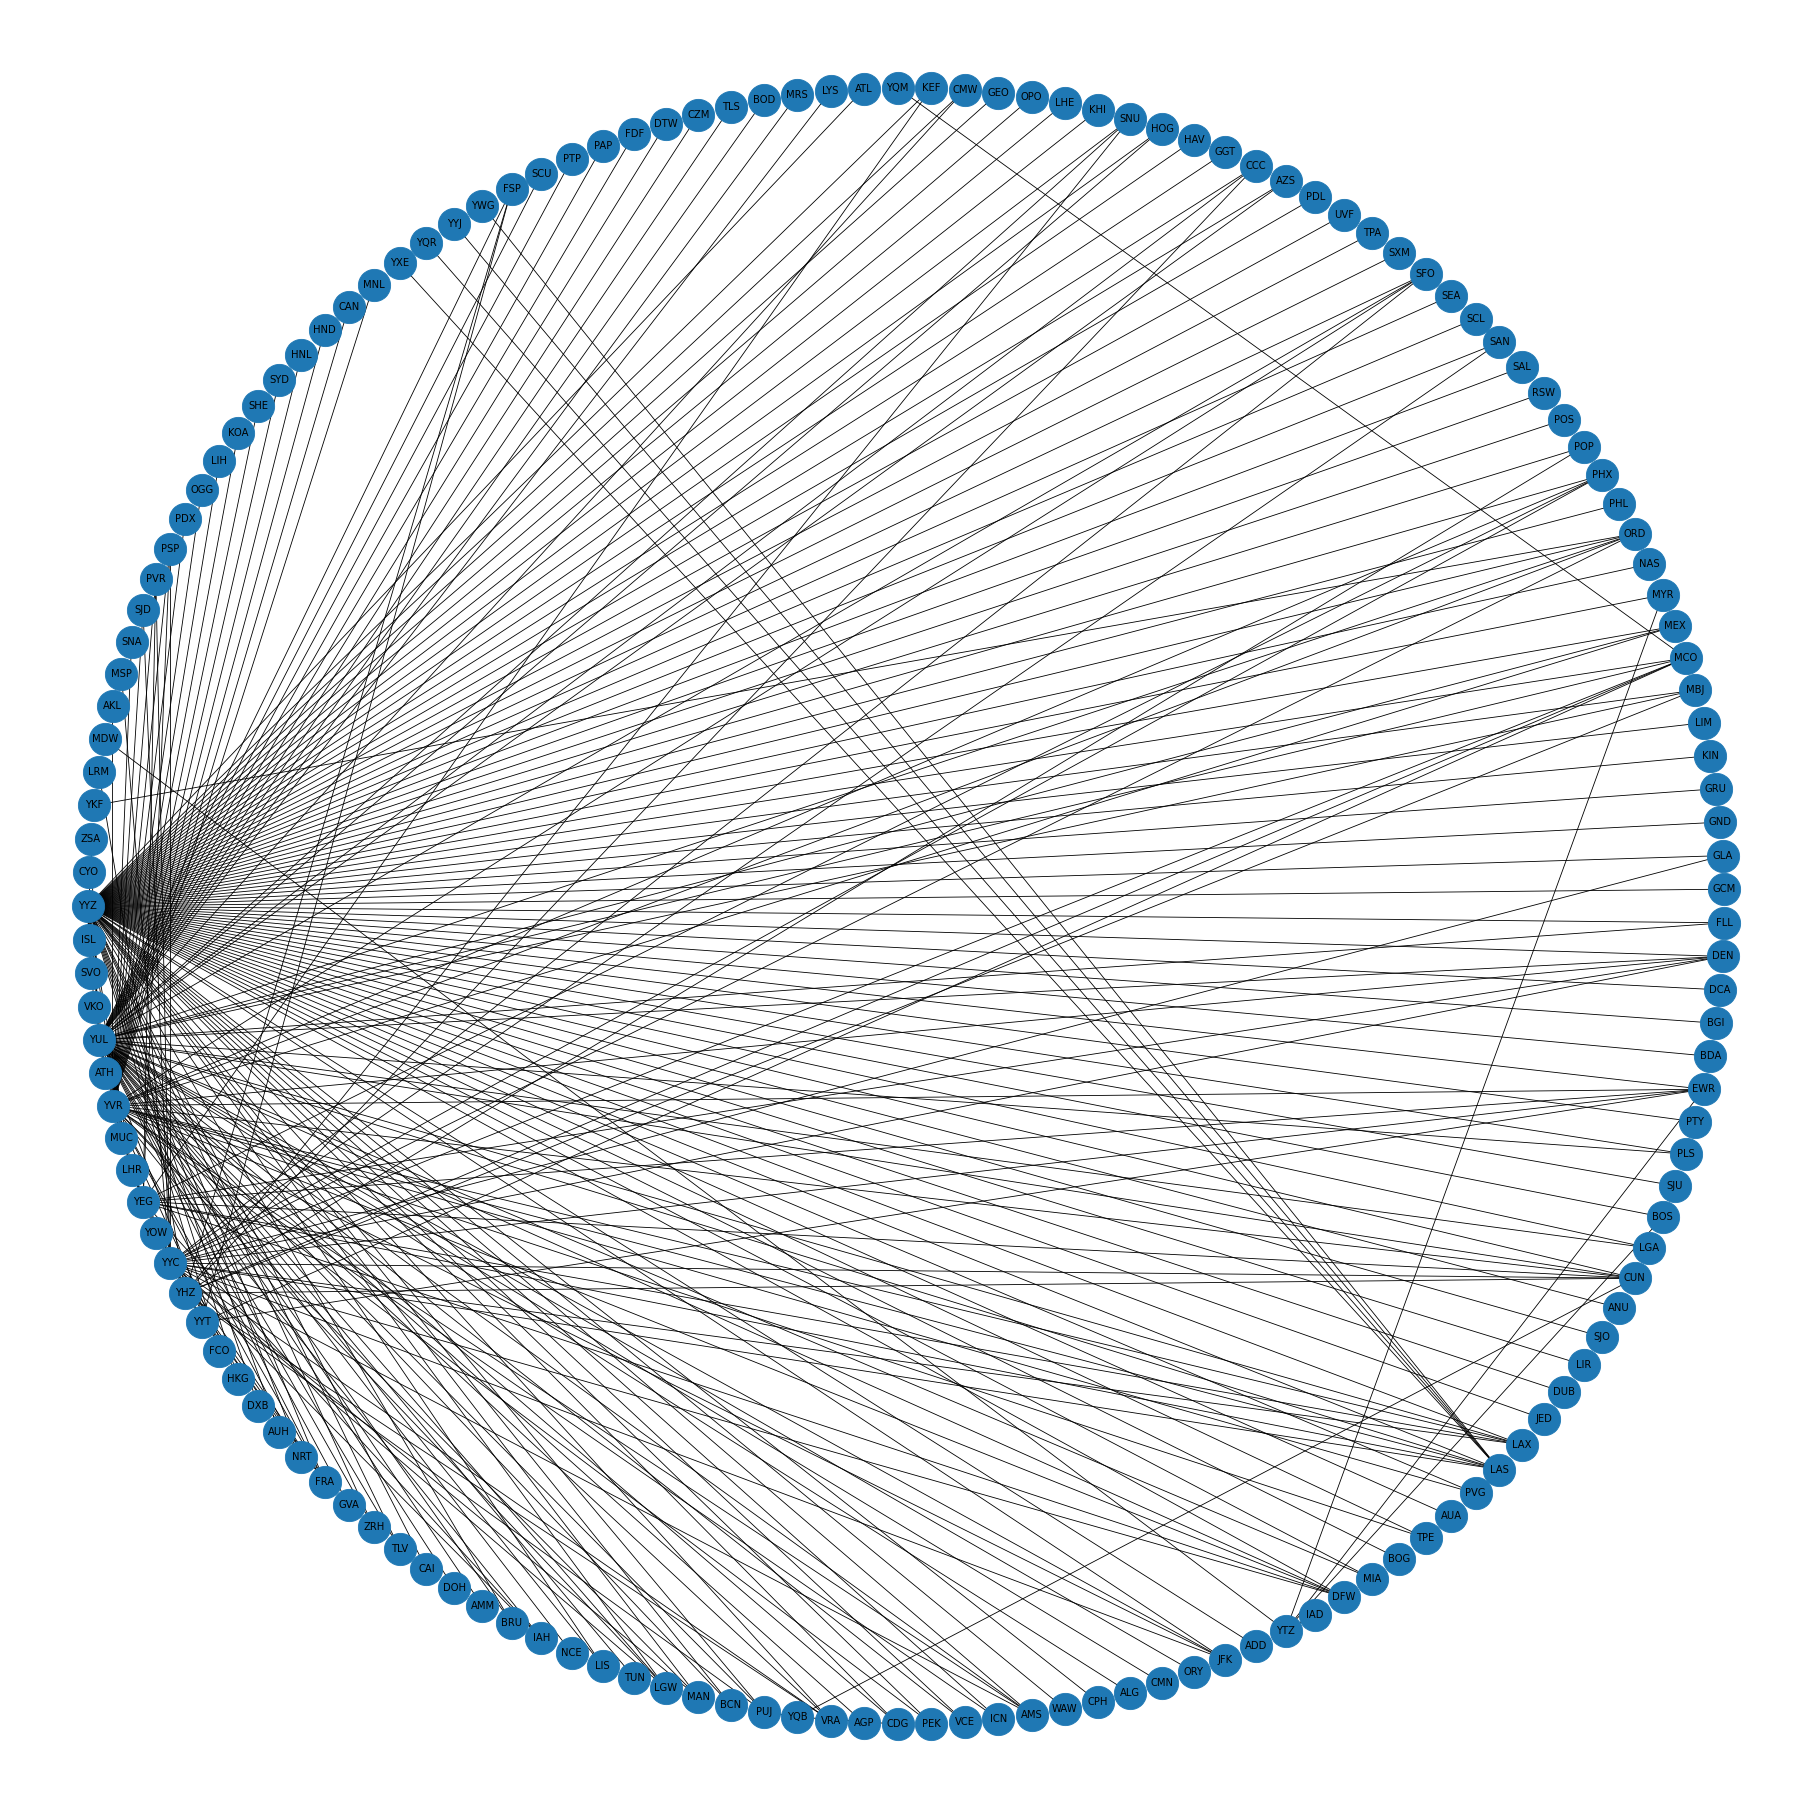

In [103]:
canada_airport_connection_graph = nx.from_pandas_edgelist(canada_route_df, 
                                                          'IATA_source_airport', 
                                                          'IATA_destination_airport', 
                                                          'distance_in_km')
fig = plt.figure(1, figsize=(30, 30), dpi=60)
nx.draw_shell(canada_airport_connection_graph, node_size=1500, with_labels=True)

# Create World Environemnt JSON

In [113]:
environment = {}

environment["countries"] = countries_json
environment["airports"] = airports_json

airports_by_country = airport_df.groupby('Country').agg(lambda x: list(x))
for country in airports_by_country.index:
    if country in environment["countries"]:
        airports_list = airports_by_country.loc[(country)]
        airports_count = len(airports_list[0])
        for airport_index in range(airports_count):
            environment["countries"][country]["airports"].append(airports_list[3][airport_index])

airlines_by_country = airlines_df.groupby('Country').agg(lambda x: list(x))
for country in airlines_by_country.index:
    if country in environment["countries"]:
        airline_list = airlines_by_country.loc[(country)]
        airline_count = len(airline_list[0])
        for airline_index in range(airline_count):
            environment["countries"][country]["airlines"][airline_list[2][airline_index]] = {
                "name": airline_list[1][airline_index],
                "iata": airline_list[2][airline_index],
                "airplanes": {}
            }

routes_by_country_airline = joined_route_df[["Country_airline",
                                             "Name_airline",
                                             "IATA_airline",
                                             "IATA_source_airport",
                                             "Name_source_airport",
                                             "Country_source_airport",
                                             "IATA_destination_airport",
                                             "Name_destination_airport",
                                             "Country_destination_airport",
                                             "distance_in_km"]].groupby(["Country_airline",
                                                                         "IATA_airline"]).agg(lambda x: list(x))
for country,airline in routes_by_country_airline.index:
    if country in environment["countries"]:
        if airline in environment["countries"][country]["airlines"]:
            route_list = routes_by_country_airline.loc[(country,airline)]
            route_count = len(route_list[0])
            for route_index in range(route_count):
                source_country = route_list[3][route_index]
                source_airport = route_list[1][route_index]
                dest_country = route_list[6][route_index]
                dest_airport = route_list[4][route_index]
                if source_country in environment["countries"]:
                    if dest_country in environment["countries"]:
                        if source_airport in environment["airports"]:
                            if dest_airport in environment["airports"]:
                                airplane_id = airline + "-" + route_list[1][route_index] + "-" + route_list[4][route_index] 
                                environment["countries"][country]["airlines"][airline]["airplanes"][airplane_id] = {
                                    "airline": airline,
                                    "source_airport": source_airport,
                                    "destination_airport": dest_airport,
                                    "distance": route_list[7][route_index]
                                }

# environment["countries"]["United Arab Emirates"]["airlines"]["EK"]
# environment["airports"]

In [118]:
with open(ENVIRONMENT_DATA_FILE, 'w') as fp:
    json.dump(environment, fp)